In [1]:
import numpy as np

v = np.linspace(-150, 0, 1000)

#nat
nat_k = 7.2
nat_vhalf = -35.5
nat_minf = []
for v_ind in v:
    if v_ind < -60:
        nat_minf.append(0)
    else:
        nat_minf.append(1 / ( 1 + np.exp( ( nat_vhalf - v_ind ) / nat_k ) ))
        
nat_hinf  = 1 / ( 1 + np.exp( ( v + 40 ) / 4 ) )

#nap
nap_k = 5
nap_vhalf = -48
nap_minf = []
for v_ind in v:
    if v_ind < -67.5  :
        nap_minf.append(0)
    else:
        nap_minf.append(1 / ( 1 + np.exp( ( nap_vhalf - v_ind ) / nap_k ) ))

#kdr
kdr_k = 11
kdr_vhalfn = 0
kdr_ninf = []
for v_ind in v:
    if v_ind < -55:
        kdr_ninf.append(0)
    else:
        kdr_ninf.append(1 / ( 1 + np.exp( ( kdr_vhalfn - v_ind ) / kdr_k ) ))

#im
im_k = 10.34
im_vhalf = -35
im_inf = []
for v_ind in v:
    if v_ind < -100:
        im_inf.append(0)
    else:
        im_inf.append(1 / ( 1 + np.exp( ( im_vhalf - v_ind  ) / im_k ) ) )


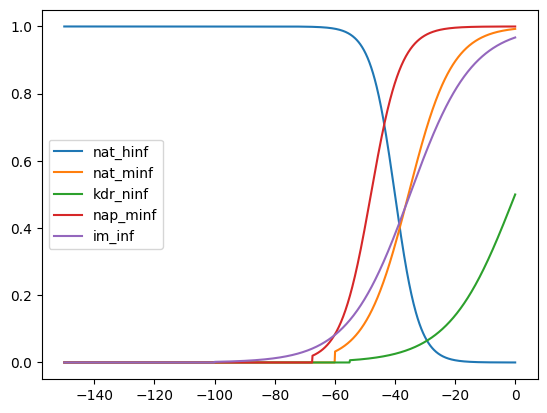

In [2]:
import matplotlib.pyplot as plt

plt.plot(v, nat_hinf, label = 'nat_hinf')
plt.plot(v, nat_minf, label = 'nat_minf')
plt.plot(v, kdr_ninf, label = 'kdr_ninf')
plt.plot(v, nap_minf, label = 'nap_minf')
plt.plot(v, im_inf, label = 'im_inf')
plt.legend()

In [3]:
import os

os.system('nrnivmodl modfiles')

/home/mwsrgf/proj/ACT/data/TODO/CA3
Mod files: "modfiles/modfiles/Gfluct_new_exc.mod" "modfiles/modfiles/Gfluct_new_inh.mod" "modfiles/modfiles/imCA3.mod" "modfiles/modfiles/kdrCA3.mod" "modfiles/modfiles/leakCA3.mod" "modfiles/modfiles/napCA3.mod" "modfiles/modfiles/natCA3.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special


/home/mwsrgf/act-venv/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


0

In [4]:
from neuron import h

h.load_file('stdrun.hoc')

h.load_file("CA3.hoc")
cell_seg = h.CA3PyramidalCell()

# CI
ci_seg = h.IClamp(cell_seg.soma[0](0.5))
ci_seg.amp = 0.1 # (nA)
ci_seg.delay = 50
ci_seg.dur = 150

# V recording
v_seg = h.Vector().record(cell_seg.soma[0](0.5)._ref_v)

# Run the simulation
h.tstop = 200
h.dt = 0.01
h.steps_per_ms = 1 / h.dt
h.v_init = -70

h.run()

import numpy as np
np.save('seg.npy', v_seg.as_numpy())

--No graphics will be displayed.


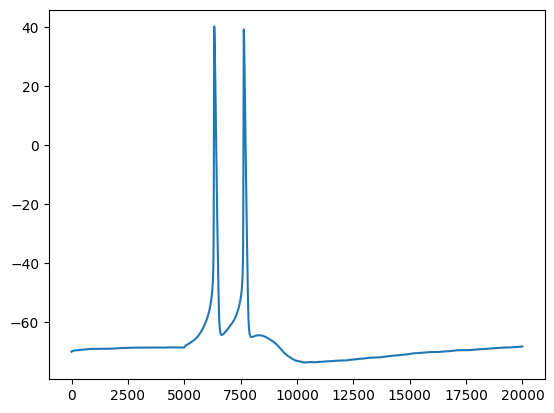

In [5]:
import matplotlib.pyplot as plt

plt.plot(v_seg, label = 'seg')